In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42, return_centers=True) # n_samples, n_features, centers, cluster_std, center_box, suffle, random_state, return_centers
#returns x (samples), y(labels) , centers
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [12]:
data_scaled

array([[-1.11618972e+00,  5.83771789e-01],
       [-1.19214185e+00,  6.58632948e-01],
       [ 3.25203835e-01,  7.96110991e-01],
       [-6.99477202e-01, -1.38795911e+00],
       [-1.41517920e+00,  5.58311957e-01],
       [-4.95826957e-01, -1.59047610e+00],
       [ 1.55613267e+00, -7.83287999e-02],
       [-5.80050487e-01, -1.65544196e+00],
       [ 7.86816008e-02,  9.62663722e-01],
       [ 1.29772382e+00, -3.46891133e-02],
       [ 5.54761692e-02,  1.29055111e+00],
       [ 1.59094764e+00, -2.51806685e-01],
       [ 2.08983612e-01,  6.77239865e-01],
       [-9.86172076e-02,  9.24856345e-01],
       [-1.15241503e+00,  6.42130301e-01],
       [ 3.64723473e-02,  9.39816576e-01],
       [-1.33742232e+00,  7.28241258e-01],
       [ 1.13980967e+00, -1.10324238e-01],
       [ 1.87813343e-01,  1.14838177e+00],
       [ 2.80568794e-01,  1.34496109e+00],
       [ 1.74275252e+00, -2.72364269e-01],
       [ 1.38883980e-01,  1.05754320e+00],
       [-4.73582122e-01, -1.58840363e+00],
       [-1.

In [3]:
data[1] # cluster labels of data[0] values

array([3, 3, 0, 2, 3, 2, 1, 2, 0, 1, 0, 1, 0, 0, 3, 0, 3, 1, 0, 0, 1, 0,
       2, 3, 0, 3, 3, 2, 2, 1, 0, 1, 3, 1, 3, 0, 3, 2, 3, 2, 1, 0, 3, 2,
       0, 0, 3, 1, 3, 1, 2, 3, 2, 0, 2, 1, 3, 1, 1, 0, 3, 1, 1, 3, 2, 2,
       2, 2, 2, 0, 2, 2, 3, 1, 0, 3, 2, 2, 0, 2, 0, 0, 3, 0, 2, 3, 3, 1,
       1, 1, 3, 0, 3, 0, 0, 3, 2, 0, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 2, 3,
       1, 0, 0, 0, 0, 1, 3, 2, 3, 2, 2, 2, 0, 3, 2, 3, 3, 0, 3, 2, 1, 0,
       0, 0, 0, 1, 1, 3, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 3, 1, 2,
       0, 1, 2, 3, 3, 1, 0, 3, 2, 3, 1, 3, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 3, 0, 3, 1, 1, 3, 2, 0, 1, 1, 2, 2, 2, 3, 1, 2, 2, 1,
       1, 3, 0, 0, 2, 1, 0, 2, 2, 3, 2, 0, 0, 2, 2, 1, 3, 2, 3, 3, 0, 3,
       3, 2, 3, 2, 1, 1, 3, 3, 1, 1, 1, 3, 0, 2, 1, 2, 3, 1, 3, 3, 3, 2,
       2, 1, 3, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 3, 1, 0, 3, 0, 1, 0, 3, 0,
       2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 3, 3, 2, 0, 0, 1, 1, 1, 1, 2, 3, 1,
       2, 1, 1, 2, 0, 2, 1, 0, 3, 0, 1, 0, 3, 3])

In [4]:
data[2]  # centers of clusters

array([[-2.50919762,  9.01428613],
       [ 4.63987884,  1.97316968],
       [-6.87962719, -6.88010959],
       [-8.83832776,  7.32352292]])

In [17]:
def initialiseCentroids(data, k):
    return np.array(random.choices(data, k=k))

In [26]:
'''Returns Eucledean distances b/w points and centers'''
def computeDistances(data, centroids):
    return np.array([[np.sqrt(np.sum(np.square(i-x))) for x in centroids] for i in data])

In [32]:
def assignClusters(distances):
    return np.array([np.argmin(x) for x in distances])

In [54]:
def updateCentroids(data, clusters, k):
    centers = []
    for i in range(k):
        cluster_i_indices = np.where(clusters == i)[0]
        count = len(cluster_i_indices)
        center = np.mean(data[cluster_i_indices], axis=0)
        centers.append(center)
    return np.array(centers)


In [59]:
def k_means(data,k,max_iterations=100):
    centers=initialiseCentroids(data,k)
    clusters=[]
    for i in range(max_iterations):
        distances=computeDistances(data,centers)
        clusters=assignClusters(distances)
        centers=updateCentroids(data,clusters,k)
    return centers,clusters

In [71]:
k=4
centroids,clusters=k_means(data_scaled,k)

In [72]:
# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)

Total within-cluster sum of squares:  17.46619760906058


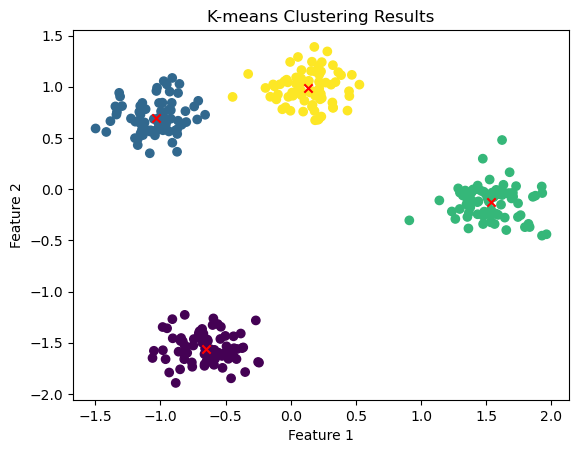

In [73]:
# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-means Clustering Results")
plt.show()